In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import plotly.graph_objects as go  

from pathlib import Path
from ast import literal_eval

# Load data

In [2]:
DATA_PATH = Path("../data")  # specify data directory

In [3]:
coordinates      = pd.read_parquet(DATA_PATH / 'coordinates.parquet')
supercog         = pd.read_parquet(DATA_PATH / 'supercogs.parquet')
heterogeneity    = pd.read_parquet(DATA_PATH / 'heterogeneity.parquet')
heterogeneity_hq = pd.read_parquet(DATA_PATH / 'heterogeneity_hq.parquet')

### Clustering results and other intermediate files

In [4]:
afdb_dark    = pd.read_csv(DATA_PATH / 'intermediate' / 'afdb_dark_clusters_e_0.01_c_0.9.csv', index_col=0)
afdb_light   = pd.read_csv(DATA_PATH / 'intermediate' / 'afdb_light_clusters_e_0.01_c_0.9.csv', index_col=0)
afdb_hq      = pd.read_csv(DATA_PATH / 'intermediate' / 'afdb_hq.csv', index_col=0)
mip_all      = pd.read_csv(DATA_PATH / 'intermediate' / 'mip_all_e_0.001_c_0.9.csv', index_col=0)
mip_size     = pd.read_csv(DATA_PATH / 'intermediate' / 'mip_lengths.csv', index_col=0)
hclust30     = pd.read_csv(DATA_PATH / 'intermediate' / 'hclust30_clusters_e_0.0001_c_0.9.csv', index_col=0)
all_clusters = pd.read_csv(DATA_PATH / 'intermediate' / 'all_clusters.csv', index_col=0)

# Preprocess data

In [5]:
heterogeneity['total_counts']    = heterogeneity.sum(axis=1)
heterogeneity_hq['total_counts'] = heterogeneity_hq.sum(axis=1)

In [6]:
heterogeneity['counts_afdb']    = heterogeneity['counts_afdb_light'] + heterogeneity['counts_afdb_dark']
heterogeneity['counts_mip']     = heterogeneity['counts_mip_clusters'] + heterogeneity['counts_mip_singletons']
heterogeneity_hq['counts_afdb'] = heterogeneity_hq['counts_afdb_light'] + heterogeneity_hq['counts_afdb_dark']
heterogeneity_hq['counts_mip']  = heterogeneity_hq['counts_mip_clusters'] + heterogeneity_hq['counts_mip_singletons']

In [7]:
heterogeneity    = heterogeneity.join(coordinates[['length']])
heterogeneity_hq = heterogeneity_hq.join(coordinates[['length']])

In [8]:
heterogeneity['cov_afdb']         = heterogeneity['counts_afdb'] / heterogeneity['total_counts']
heterogeneity['cov_mip']          = heterogeneity['counts_mip'] / heterogeneity['total_counts']
heterogeneity['cov_esmatlas']     = heterogeneity['counts_esmatlas'] / heterogeneity['total_counts']
heterogeneity_hq['cov_afdb']      = heterogeneity_hq['counts_afdb'] / heterogeneity_hq['total_counts']
heterogeneity_hq['cov_mip']       = heterogeneity_hq['counts_mip'] / heterogeneity_hq['total_counts']
heterogeneity_hq['cov_esmatlas']  = heterogeneity_hq['counts_esmatlas'] / heterogeneity_hq['total_counts']

In [9]:
all_clusters.Protein = all_clusters.Protein.apply(literal_eval)

#
---
# Plots
---

# Supplementary plots: structure size distribution

In [10]:
bins = np.arange(0, 2700, 15)
alpha = .5
colors = sns.color_palette(n_colors=4)

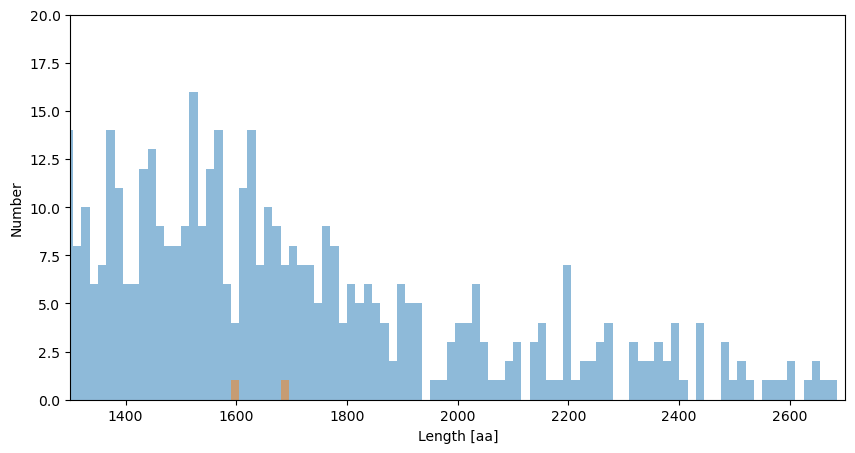

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(hclust30.Size, bins=bins, label='ESMAtlas (clusters)', 
        color=list(colors[2]) + [alpha])
plt.hist(afdb_light[afdb_light.index.isin(afdb_hq.index)].repLen, bins=bins, label='AFDB (light clusters)', 
        color=list(colors[0]) + [alpha])
plt.hist(afdb_dark[afdb_dark.index.isin(afdb_hq.index)].repLen, bins=bins, label='AFDB (dark clusters)', 
        color=list(colors[1]) + [alpha])
plt.hist(mip_size.Size, bins=bins, label='MIP (clusters + singletons)', 
        color=list(colors[3]) + [alpha])
plt.xlabel('Length [aa]')
plt.ylabel('Number')
plt.xlim([1300, 2700])
plt.ylim([0, 20])
plt.show()

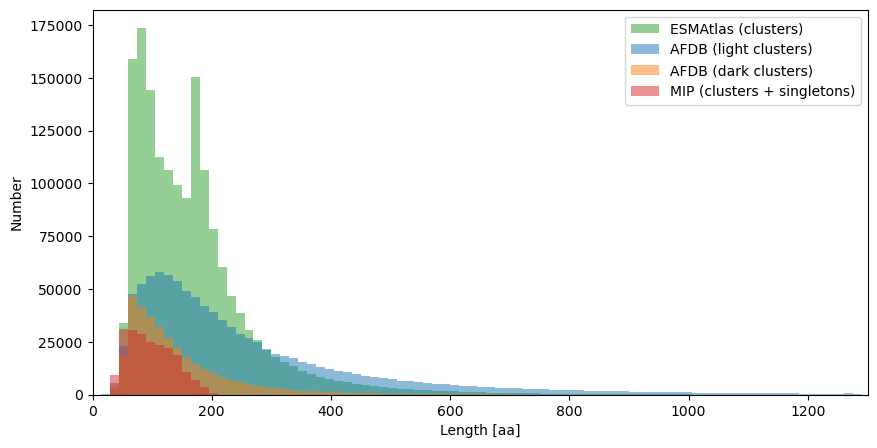

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(hclust30.Size, bins=bins, label='ESMAtlas (clusters)', 
        color=list(colors[2]) + [alpha])
plt.hist(afdb_light[afdb_light.index.isin(afdb_hq.index)].repLen, bins=bins, label='AFDB (light clusters)', 
        color=list(colors[0]) + [alpha])
plt.hist(afdb_dark[afdb_dark.index.isin(afdb_hq.index)].repLen, bins=bins, label='AFDB (dark clusters)', 
        color=list(colors[1]) + [alpha])
plt.hist(mip_size.Size, bins=bins, label='MIP (clusters + singletons)', 
        color=list(colors[3]) + [alpha])
plt.legend()
plt.xlabel('Length [aa]')
plt.xlim([0, 1300])
plt.ylabel('Number')
plt.show()

# Figure 5D

In [13]:
bins = [np.arange(1, 2700, 50), np.arange(1, 2700, 50), np.arange(1, 205, 5)]

In [14]:
bin_ratios = {}
bin_ratios['afdb'] = (np.histogram(heterogeneity_hq[(heterogeneity_hq.counts_afdb==1) &\
                                   (heterogeneity_hq.total_counts==1)].length, bins[0])[0] /\
                    np.histogram(afdb_hq.repLen, bins[0])[0])
bin_ratios['esmatlas'] = (np.histogram(heterogeneity_hq[(heterogeneity_hq.counts_esmatlas==1) &\
                                       (heterogeneity_hq.total_counts==1)].length, bins[1])[0] /\
                    np.histogram(hclust30.Size, bins[1])[0])
bin_ratios['mip'] = (np.histogram(heterogeneity_hq[(heterogeneity_hq.counts_mip==1) &\
                                  (heterogeneity_hq.total_counts==1)].length, bins[2])[0] /\
                    np.histogram(mip_size.Size, bins[2])[0])

/tmp/ipykernel_4097391/690958214.py:5: RuntimeWarning: invalid value encountered in divide
  bin_ratios['esmatlas'] = (np.histogram(heterogeneity_hq[(heterogeneity_hq.counts_esmatlas==1) &\
/tmp/ipykernel_4097391/690958214.py:8: RuntimeWarning: invalid value encountered in divide
  bin_ratios['mip'] = (np.histogram(heterogeneity_hq[(heterogeneity_hq.counts_mip==1) &\


### High quality AF-DB

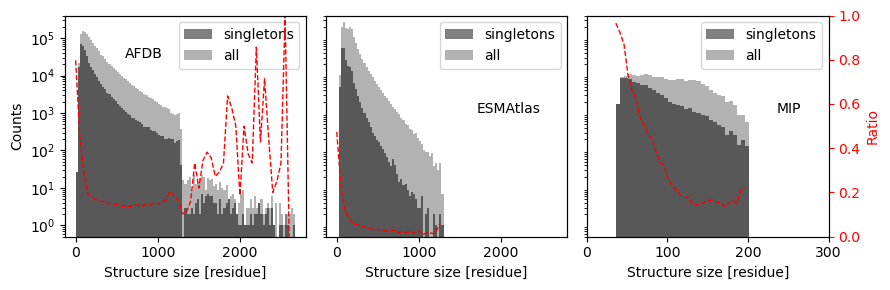

In [15]:
kwargs = {'bins': np.arange(1, 2700, 25), 'color': 'k'}
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
# singletons
ax[0].hist(heterogeneity_hq[(heterogeneity_hq.counts_afdb==1) & (heterogeneity_hq.total_counts==1)].length, 
           label='singletons', **kwargs, alpha=0.5)
ax[1].hist(heterogeneity_hq[(heterogeneity_hq.counts_esmatlas==1) & (heterogeneity_hq.total_counts==1)].length, 
           label='singletons', **kwargs, alpha=0.5)
ax[2].hist(heterogeneity_hq[(heterogeneity_hq.counts_mip==1) & (heterogeneity_hq.total_counts==1)].length, 
           label='singletons', bins=np.arange(1, 205, 5),  color='k', alpha=0.5)
#all
ax[0].hist(afdb_hq.repLen, label='all', **kwargs, alpha=0.3)
ax[1].hist(hclust30.Size, label='all', **kwargs, alpha=0.3)
ax[2].hist(mip_size.Size, label='all', bins=np.arange(1, 205, 5), color='k', alpha=0.3)
# ratios
ax2 = [0, 0, 0]
for i, key in enumerate(bin_ratios.keys()):
    ax[i].legend()
    ax[i].set_yscale('log')
    ax2[i]= ax[i].twinx()
    ax2[i].plot(bins[i][:-1], bin_ratios[key], lw=1, c='r', ls='--')
    ax2[i].set_ylim([0, 1])
    ax[i].set_ylim([0.5, 4e5])
    ax[i].set_xlabel("Structure size [residue]")
ax2[2].tick_params(axis='y', colors='red')
ax2[2].yaxis.label.set_color('red')
for i in [0, 1]:
    ax2[i].set_yticks([])
    ax[i+1].set_yticks([])
# ax[1].set_xlim([-50, 1420])
ax[2].set_xlim([0, 300])
ax[0].set_ylabel('Counts')
ax2[2].set_ylabel('Ratio')
ax[0].text(600, 30000, 'AFDB')
ax[1].text(1700, 1000, 'ESMAtlas')
ax[2].text(235, 1000, 'MIP')
plt.tight_layout()
plt.show()

# Figure 5E

In [16]:
long_struct = heterogeneity[(heterogeneity.length >= 1300) & (heterogeneity.total_counts > 1)]
long_struct = long_struct.join(coordinates[['afdb_pLDDT']])

In [17]:
# Based on all structures in cluster
long_struct_joined = long_struct.join(all_clusters, how='left').explode('Protein')
long_struct_joined['lowPlddt'] = 0
long_struct_joined.loc[long_struct_joined.afdb_pLDDT <= 50, 'lowPlddt'] = 1
long_struct_joined = long_struct_joined[['lowPlddt']].reset_index().groupby('protein')[['lowPlddt']].agg('sum')
long_struct = long_struct.join(long_struct_joined)

In [18]:
long_struct = long_struct.sort_values(['total_counts', 'lowPlddt'], ascending=[False, False])

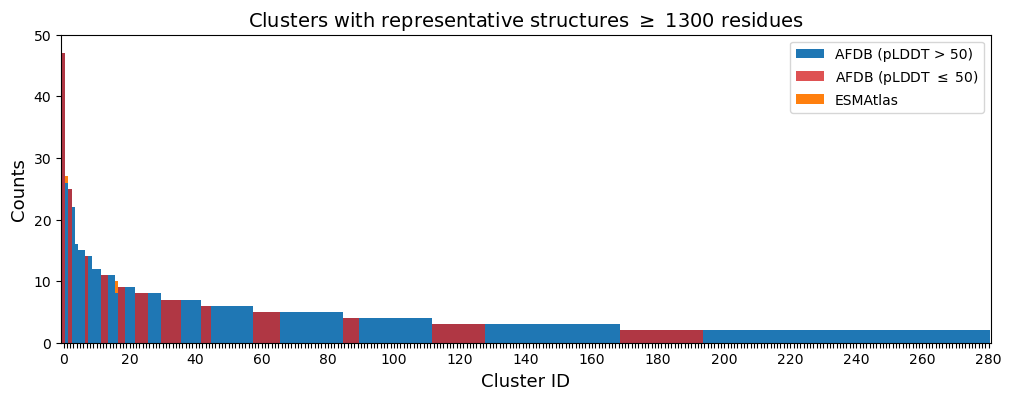

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
long_struct[['counts_afdb', 'counts_esmatlas']].reset_index().plot(kind='bar', stacked=True,  ax=ax, width=1, alpha=1,
                                                  color=[sns.color_palette()[0], sns.color_palette()[1]])
long_struct[['lowPlddt']].reset_index().reset_index().fillna(0).plot(kind='bar', x='index', y='lowPlddt', width=1,
                                                                     ax=ax, linewidth=1, alpha=.8, color=sns.color_palette()[3])
handles, _ = plt.gca().get_legend_handles_labels()
labels = ['AFDB (pLDDT > 50)', 'ESMAtlas', r'AFDB (pLDDT $\leq$ 50)']
order = [0,2,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.set_ylim([0, 50])
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 20) != 0:
        t.set_visible(False)
plt.xticks(rotation=0)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Counts', fontsize=13)
plt.title(r'Clusters with representative structures $\geq$ 1300 residues', fontsize=14)
plt.show()

# Figure 5C

In [20]:
homo_clust_hq = (
    heterogeneity_hq[(heterogeneity_hq.total_counts > 1 ) &
    ((heterogeneity_hq.cov_afdb == 1) | (heterogeneity_hq.cov_esmatlas == 1) | (heterogeneity_hq.cov_mip == 1)) & 
    (heterogeneity_hq.length < 1300)]
)

In [21]:
homo_clust_hq = homo_clust_hq.join(coordinates[['origin']])
homo_clust_hq.loc[homo_clust_hq.origin.str.startswith('MIP'), 'DB'] = 'MIP'
homo_clust_hq.loc[homo_clust_hq.origin.str.startswith('AF'), 'DB']  = 'AFDB'
homo_clust_hq.loc[homo_clust_hq.origin.str.startswith('ESM'), 'DB'] = 'ESMAtlas'

In [22]:
homo_clust_hq['total_counts_binned'] = pd.cut(homo_clust_hq.total_counts, 
                                             bins=[1, 2, 3, 5, 10, 50, homo_clust_hq.total_counts.max()], 
                           labels=['2', '3', '[4, 5]', '[6, 10]', '[11, 50]', f'[51, {homo_clust_hq.total_counts.max()}]'])

In [23]:
homo_clust_lengths_hq = homo_clust_hq.groupby(['DB', 'total_counts_binned'])['total_counts'].agg(['count', 'sum']).reset_index()  # number of clusters / structures

/tmp/ipykernel_4097391/1094094424.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  homo_clust_lengths_hq = homo_clust_hq.groupby(['DB', 'total_counts_binned'])['total_counts'].agg(['count', 'sum']).reset_index()  # number of clusters / structures


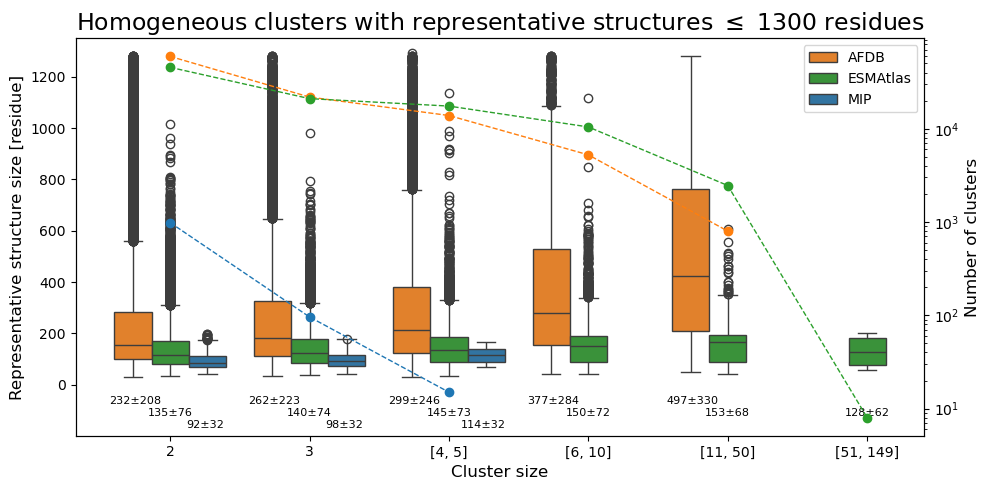

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
palette = [sns.color_palette("tab10")[k] for k in [1, 2, 0]]

# Plot the boxplot
g = sns.boxplot(
    data=homo_clust_hq,
    y='length',
    x='total_counts_binned',
    hue='DB',
    ax=ax,
    hue_order=['AFDB', 'ESMAtlas', 'MIP'],
    palette=palette
)

# Clean up legend
ax.legend().set_title('')
for t, l in zip(g.legend_.texts, ['AFDB', 'ESMAtlas', 'MIP']):
    t.set_text(l)

# Secondary axis with log scale
ax2 = ax.twinx()
for i, db in enumerate(['AFDB', 'ESMAtlas', 'MIP']):
    inp = homo_clust_lengths_hq[homo_clust_lengths_hq.DB == db].replace(0, np.nan)
    ax2.plot(inp.total_counts_binned, inp['count'], '--o', lw=1, color=palette[i])

ax2.set_yscale('log')
ax.set_xlabel('Cluster size', fontsize=12)
ax.set_ylim([-199, 1350])
ax.set_ylabel('Representative structure size [residue]', fontsize=12)
ax2.set_ylabel('Number of clusters', fontsize=12)

plt.title(r'Homogeneous clusters with representative structures $\leq$ 1300 residues', fontsize=17)
plt.tight_layout()
sns.move_legend(g, "upper right")

# Add mean ± std below each box (x-category + DB combo)
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
xlabels = [tick.get_text() for tick in xticklabels]
hue_order = ['AFDB', 'ESMAtlas', 'MIP']
n_hue = len(hue_order)

# Width between boxplots per x-bin
tick_spacing = xticks[1] - xticks[0] if len(xticks) > 1 else 1
offsets = np.linspace(-0.25, 0.25, n_hue) * tick_spacing   # Adjust spacing if needed

# Ladder-style vertical spacing
base_y = ax.get_ylim()[0] + 0.1 * (ax.get_ylim()[1] - ax.get_ylim()[0])
y_step = 0.03 * (ax.get_ylim()[1] - ax.get_ylim()[0])  # space between lines

for i, xcat in enumerate(xlabels):
    for j, db in enumerate(hue_order):
        # Filter data for this x-bin and DB
        sub_df = homo_clust_hq[
            (homo_clust_hq['total_counts_binned'] == xcat) & 
            (homo_clust_hq['DB'] == db)
        ]
        if not sub_df.empty:
            mean = sub_df['length'].mean()
            std = sub_df['length'].std()
            xpos = xticks[i] + offsets[j]

            # Apply ladder-style vertical spacing
            ypos = base_y - j * y_step

            ax.text(
                xpos,
                ypos,
                f'{mean:.0f}±{std:.0f}',
                ha='center',
                va='top',
                fontsize=8,
            )
plt.show()

# Figure 5B + supplementary plots

## 1. Homogeneous clusters

In [25]:
cols = ['superCOG 1', 'superCOG 2', 'superCOG 3', 'unannotated', 'general function']

In [26]:
k = 'AFDB'
# k = 'ESMAtlas'
# k = 'MIP'

In [27]:
tmp = homo_clust_hq[homo_clust_hq['DB']==k]
homo_clust_super_counts = {}
for gr in tmp.join(supercog).groupby('total_counts_binned', observed=True):
    homo_clust_super_counts[gr[0]] = gr[1][['superCOG_v10']].value_counts()

In [28]:
homo_clust_super_merged = {}
for lab, v in homo_clust_super_counts.items():
    homo_clust_super_merged[lab] = (v / sum(v) * 100).to_frame().reset_index()
    homo_clust_super_merged[lab]['kind'] = lab
homo_clust_super_merged = pd.concat(homo_clust_super_merged.values())

In [29]:
homo_clust_super_merged = homo_clust_super_merged[homo_clust_super_merged.superCOG_v10.isin(cols)]
homo_clust_super_merged.reset_index(inplace=True)

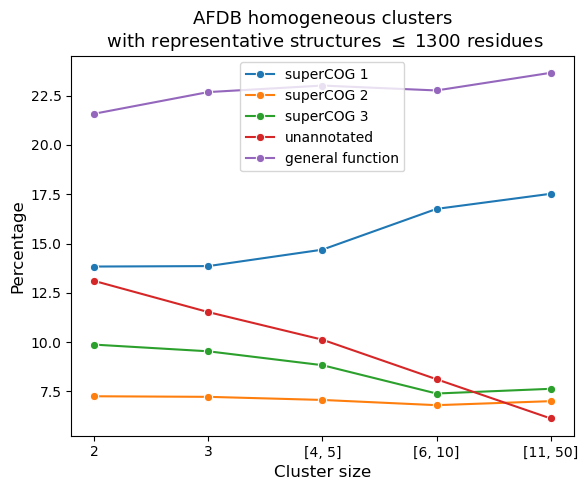

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
g = sns.lineplot(data=homo_clust_super_merged, x='kind', y='count', hue_order=cols,
             hue='superCOG_v10', marker='o', ax=ax)
g.legend_.set_title(None)
for t, l in zip(g.legend_.texts, cols):
    t.set_text(l)
ax.set_xlabel('Cluster size', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
plt.title(f'{k} homogeneous clusters\n with' +\
          r' representative structures $\leq$ 1300 residues', fontsize=13)
plt.tight_layout()
plt.show()

### Consider different functions per cluster

In [31]:
tmp = homo_clust_hq[homo_clust_hq['DB']==k].join(all_clusters)
# IMPOSE RESTRICTIONS ON NUMBER OF SAMPLES / STRUCTURE SIZE
# tmp = tmp[(tmp.prot_len < 300) & (tmp.prot_len > 200)]
exploded = tmp.explode('Protein')
exploded = exploded.join(supercog[['superCOG_v10']], on='Protein')

In [32]:
exploded_gr = exploded.reset_index().groupby(['total_counts_binned', 'protein', 'superCOG_v10'], 
                                             observed=False).size().unstack()
exploded_gr = exploded_gr.loc[~(exploded_gr==0).all(axis=1)]

In [33]:
exploded_gr = exploded_gr.div(exploded_gr.sum(axis=1), axis=0) * 100

#### Just make sure it's similar to the one above

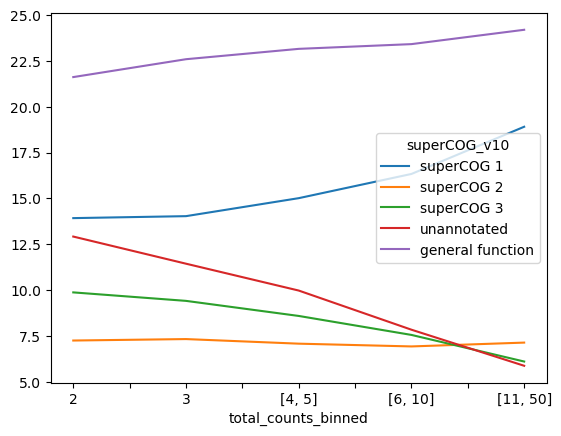

In [34]:
exploded_gr.reset_index(level=[0,1]).groupby('total_counts_binned', observed=False)[cols].agg('mean').plot();

### High functional consistency in clusters

In [35]:
exploded_gr_hq = exploded_gr[(exploded_gr > 50).sum(axis=1) == 1]
print(len(exploded_gr_hq) / len(exploded_gr) * 100)
exploded_gr_hq_melted = exploded_gr_hq.reset_index(level=[0,1]).\
groupby('total_counts_binned', observed=False)[cols].agg('mean').dropna()

38.721206915276994


In [36]:
exploded_gr_hq_melted = pd.melt(exploded_gr_hq_melted.reset_index().rename(columns={'total_counts_binned': 'kind'}),
                                id_vars=['kind'], value_vars=cols, value_name='count')

In [37]:
exploded_gr_hq_melted.reset_index(inplace=True)

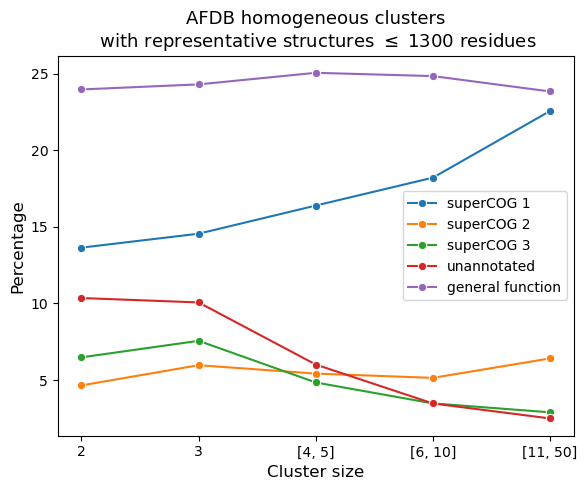

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
g = sns.lineplot(data=exploded_gr_hq_melted, x='kind', y='count', hue_order=cols,
             hue='superCOG_v10', marker='o', ax=ax)
g.legend_.set_title(None)
for t, l in zip(g.legend_.texts, cols):
    t.set_text(l)
ax.set_xlabel('Cluster size', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
plt.title(f'{k} homogeneous clusters\n with' +\
          r' representative structures $\leq$ 1300 residues', fontsize=13)
plt.tight_layout()
plt.show()

## 2. Heterogeneous clusters

### Exclude long repr. structutres (see above)

In [39]:
hetero_clust = {}
hetero_clust['AFDB + ESMAtlas'] = (
    heterogeneity[(heterogeneity.counts_afdb > 0) & (heterogeneity.counts_esmatlas > 0) & (heterogeneity.counts_mip == 0) & 
    (heterogeneity.length < 1300)]
)
hetero_clust['AFDB + ESMAtlas + MIP'] = (
    heterogeneity[(heterogeneity.counts_afdb > 0) & (heterogeneity.counts_esmatlas > 0) & (heterogeneity.counts_mip > 0) & 
    (heterogeneity.length < 1300)]
)
hetero_clust['AFDB + MIP'] = (
    heterogeneity[(heterogeneity.counts_afdb > 0) & (heterogeneity.counts_esmatlas == 0) & (heterogeneity.counts_mip > 0) & 
    (heterogeneity.length < 1300)]
)
hetero_clust['ESMAtlas + MIP'] = (
    heterogeneity[(heterogeneity.counts_afdb == 0) & (heterogeneity.counts_esmatlas > 0) & (heterogeneity.counts_mip > 0) & 
    (heterogeneity.length < 1300)]
)

In [40]:
for k in hetero_clust.keys():
    if k in ['AFDB + MIP', 'ESMAtlas + MIP']:
        hetero_clust[k]['len_binned'] = pd.cut(hetero_clust[k].total_counts, 
                                               bins=[1, 2, 3, 5, 10, hetero_clust[k].total_counts.max()],
                               labels=['2', '3', '[4, 5]', '[6, 10]', f'[11, {hetero_clust[k].total_counts.max()}]'])
    else:
        hetero_clust[k]['len_binned'] = pd.cut(hetero_clust[k].total_counts,
                                               bins=[1, 2, 3, 5, 10, 50, hetero_clust[k].total_counts.max()],
                               labels=['2', '3', '[4, 5]', '[6, 10]', '[11, 50]', f'[51, {hetero_clust[k].total_counts.max()}]'])
    hetero_clust[k] = hetero_clust[k].join(all_clusters)

/tmp/ipykernel_4097391/1654296448.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hetero_clust[k]['len_binned'] = pd.cut(hetero_clust[k].total_counts,
/tmp/ipykernel_4097391/1654296448.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hetero_clust[k]['len_binned'] = pd.cut(hetero_clust[k].total_counts,
/tmp/ipykernel_4097391/1654296448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [41]:
hetero_clust_lengths = {}
for k in hetero_clust.keys():
    hetero_clust_lengths[k] = hetero_clust[k].groupby(['len_binned'])['total_counts'].agg(['count', 'sum']).reset_index()  # number of clusters / structures
    hetero_clust_lengths[k]['DB'] = k

/tmp/ipykernel_4097391/4002941966.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hetero_clust_lengths[k] = hetero_clust[k].groupby(['len_binned'])['total_counts'].agg(['count', 'sum']).reset_index()  # number of clusters / structures
/tmp/ipykernel_4097391/4002941966.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hetero_clust_lengths[k] = hetero_clust[k].groupby(['len_binned'])['total_counts'].agg(['count', 'sum']).reset_index()  # number of clusters / structures
/tmp/ipykernel_4097391/4002941966.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future

### High quality AF-DB 

In [42]:
hetero_clust_hq = {}
hetero_clust_hq['AFDB + ESMAtlas'] = (
    heterogeneity_hq[(heterogeneity_hq.counts_afdb > 0) & (heterogeneity_hq.counts_esmatlas > 0) & (heterogeneity_hq.counts_mip == 0) & 
    (heterogeneity_hq.length < 1300)]
)
hetero_clust_hq['AFDB + ESMAtlas + MIP'] = (
    heterogeneity_hq[(heterogeneity_hq.counts_afdb > 0) & (heterogeneity_hq.counts_esmatlas > 0) & (heterogeneity_hq.counts_mip > 0) & 
    (heterogeneity_hq.length < 1300)]
)
hetero_clust_hq['AFDB + MIP'] = (
    heterogeneity_hq[(heterogeneity_hq.counts_afdb > 0) & (heterogeneity_hq.counts_esmatlas == 0) & (heterogeneity_hq.counts_mip > 0) & 
    (heterogeneity_hq.length < 1300)]
)
hetero_clust_hq['ESMAtlas + MIP'] = (
    heterogeneity_hq[(heterogeneity_hq.counts_afdb == 0) & (heterogeneity_hq.counts_esmatlas > 0) & (heterogeneity_hq.counts_mip > 0) & 
    (heterogeneity_hq.length < 1300)]
)

In [43]:
for k in hetero_clust_hq.keys():
    hetero_clust_hq[k].index = hetero_clust_hq[k].index.str.replace('.cif', '')
    if k in ['AFDB + MIP', 'ESMAtlas + MIP']:
        hetero_clust_hq[k]['len_binned'] = pd.cut(hetero_clust_hq[k].total_counts, bins=[1, 2, 3, 5, 10, hetero_clust_hq[k].total_counts.max()],
                               labels=['2', '3', '[4, 5]', '[6, 10]', f'[11, {hetero_clust_hq[k].total_counts.max()}]'])
    else:
        hetero_clust_hq[k]['len_binned'] = pd.cut(hetero_clust_hq[k].total_counts, bins=[1, 2, 3, 5, 10, 50, hetero_clust_hq[k].total_counts.max()],
                               labels=['2', '3', '[4, 5]', '[6, 10]', '[11, 50]', f'[51, {hetero_clust_hq[k].total_counts.max()}]'])
    hetero_clust_hq[k] = hetero_clust_hq[k].join(all_clusters)

/tmp/ipykernel_4097391/845186626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hetero_clust_hq[k]['len_binned'] = pd.cut(hetero_clust_hq[k].total_counts, bins=[1, 2, 3, 5, 10, 50, hetero_clust_hq[k].total_counts.max()],
/tmp/ipykernel_4097391/845186626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hetero_clust_hq[k]['len_binned'] = pd.cut(hetero_clust_hq[k].total_counts, bins=[1, 2, 3, 5, 10, 50, hetero_clust_hq[k].total_counts.max()],
/tmp/ipykernel_4097391/845186626.py:4: SettingWithCopyWarnin

In [44]:
hetero_clust_lengths_hq = {}
for k in hetero_clust_hq.keys():
    hetero_clust_lengths_hq[k] = hetero_clust_hq[k].groupby(['len_binned'])['total_counts'].agg(['count', 'sum']).reset_index()  # number of clusters / structures
    hetero_clust_lengths_hq[k]['DB'] = k

/tmp/ipykernel_4097391/521511190.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hetero_clust_lengths_hq[k] = hetero_clust_hq[k].groupby(['len_binned'])['total_counts'].agg(['count', 'sum']).reset_index()  # number of clusters / structures
/tmp/ipykernel_4097391/521511190.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hetero_clust_lengths_hq[k] = hetero_clust_hq[k].groupby(['len_binned'])['total_counts'].agg(['count', 'sum']).reset_index()  # number of clusters / structures
/tmp/ipykernel_4097391/521511190.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in

/tmp/ipykernel_4097391/545406309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(data=hetero_clust_hq[k], y='length', x='len_binned',
/tmp/ipykernel_4097391/545406309.py:3: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  g = sns.boxplot(data=hetero_clust_hq[k], y='length', x='len_binned',


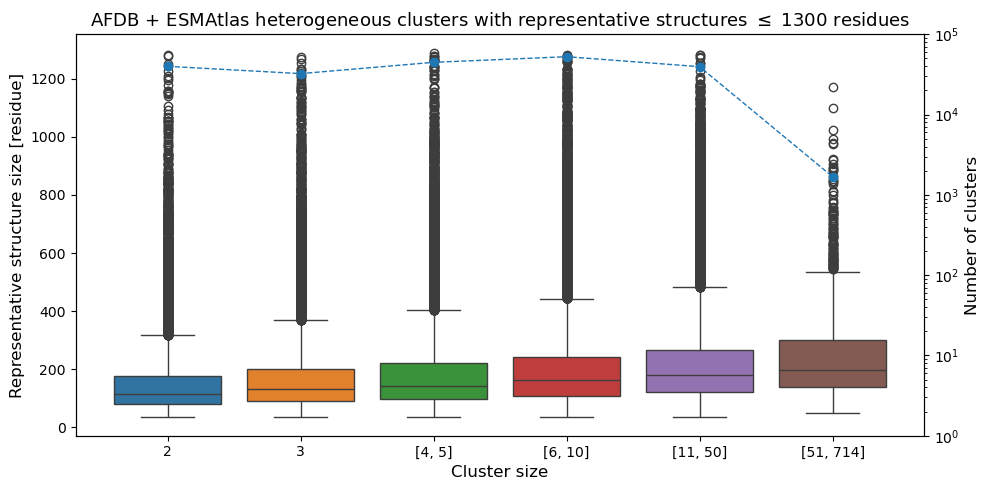

/tmp/ipykernel_4097391/545406309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(data=hetero_clust_hq[k], y='length', x='len_binned',
/tmp/ipykernel_4097391/545406309.py:3: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  g = sns.boxplot(data=hetero_clust_hq[k], y='length', x='len_binned',


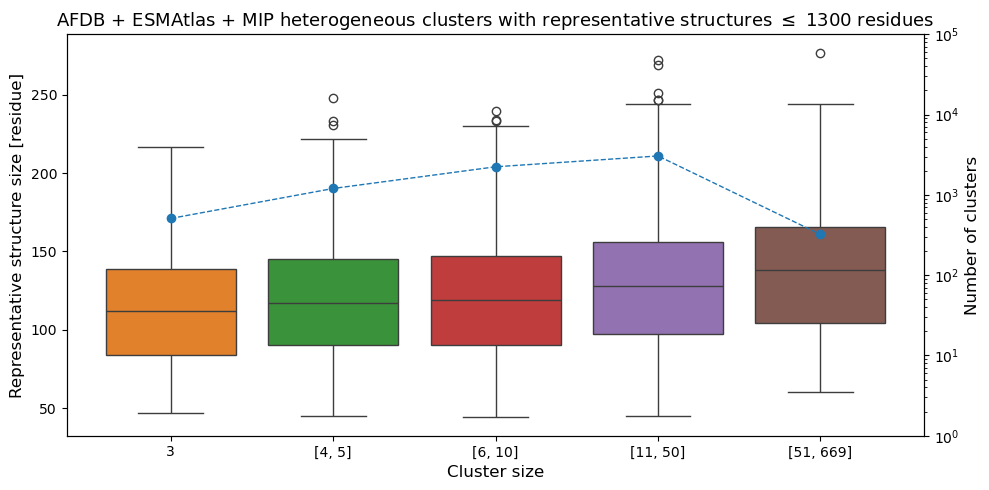

/tmp/ipykernel_4097391/545406309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(data=hetero_clust_hq[k], y='length', x='len_binned',
/tmp/ipykernel_4097391/545406309.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  g = sns.boxplot(data=hetero_clust_hq[k], y='length', x='len_binned',


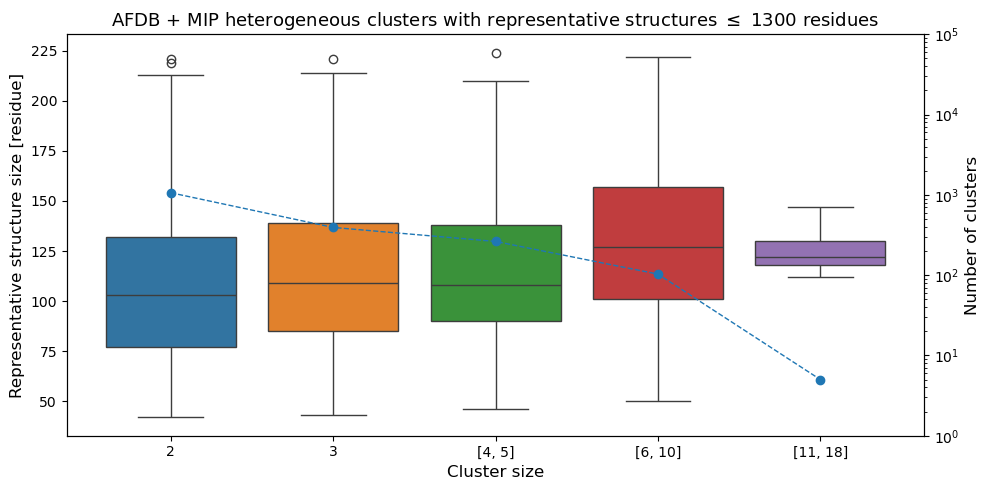

/tmp/ipykernel_4097391/545406309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(data=hetero_clust_hq[k], y='length', x='len_binned',
/tmp/ipykernel_4097391/545406309.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  g = sns.boxplot(data=hetero_clust_hq[k], y='length', x='len_binned',


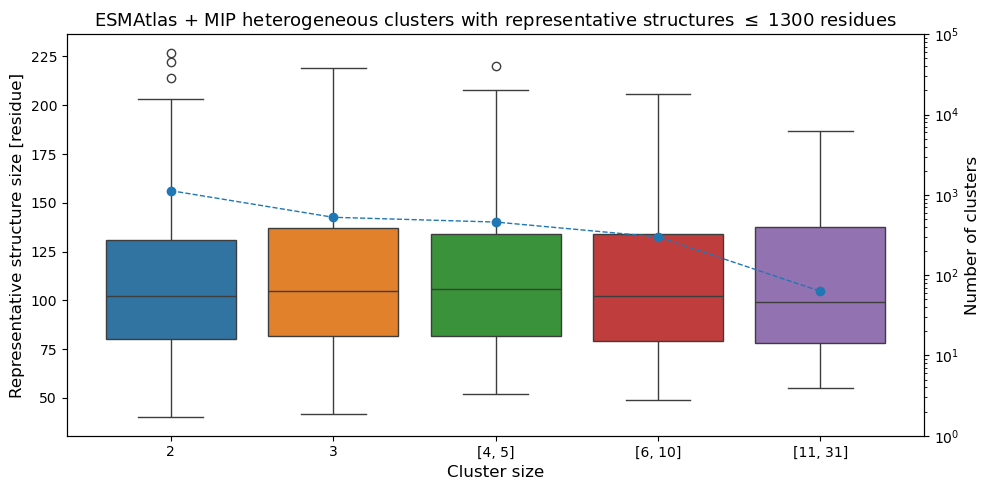

In [45]:
for k in hetero_clust_hq.keys():
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    g = sns.boxplot(data=hetero_clust_hq[k], y='length', x='len_binned',
                    ax=ax, palette=sns.color_palette())
    ax2 = ax.twinx()
    inp = hetero_clust_lengths_hq[k].replace(0, np.nan)
    ax2.plot(inp['count'], '--o', lw=1)
    ax2.set_yscale('log')
    ax2.set_ylim([1e0, 1e5])
    ax.set_xlabel('Cluster size', fontsize=12)
    ax.set_ylabel('Representative structure size [residue]', fontsize=12)
    ax2.set_ylabel('Number of clusters', fontsize=12)
    plt.title(k + r' heterogeneous clusters with representative structures $\leq$ 1300 residues', fontsize=13)
    plt.tight_layout()
    plt.show()

### SuperCOGs (only high-quality AFDB)

In [46]:
k = 'AFDB + ESMAtlas'
# k = 'AFDB + ESMAtlas + MIP'

In [47]:
hetero_clust_super_counts = {}
for gr in hetero_clust_hq[k].join(supercog).groupby('len_binned', observed=True):
    hetero_clust_super_counts[gr[0]] = gr[1][['superCOG_v10']].value_counts()

In [48]:
hetero_clust_super_merged = {}
for lab, v in hetero_clust_super_counts.items():
    hetero_clust_super_merged[lab] = (v / sum(v) * 100).to_frame().reset_index()
    hetero_clust_super_merged[lab]['kind'] = lab
hetero_clust_super_merged = pd.concat(hetero_clust_super_merged.values())

In [49]:
hetero_clust_super_merged = hetero_clust_super_merged[hetero_clust_super_merged.superCOG_v10.isin(cols)]

In [50]:
hetero_clust_super_merged.reset_index(inplace=True)

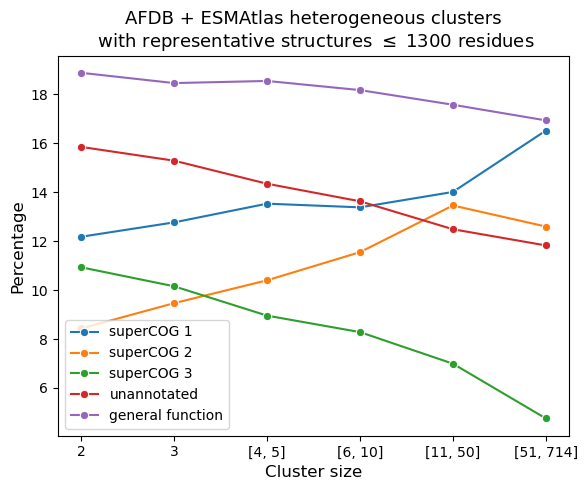

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
palette = ['#660301', '#013365', '#005B15', '#7F988A']
palette = [sns.color_palette("tab10")[k] for k in [1, 0, 3, 2]]
g = sns.lineplot(data=hetero_clust_super_merged, x='kind', y='count', hue_order=cols,
             hue='superCOG_v10', marker='o', ax=ax)#, palette=palette)
g.legend_.set_title(None)
for t, l in zip(g.legend_.texts, cols):
    t.set_text(l)
ax.set_xlabel('Cluster size', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
plt.title(f'{k} heterogeneous clusters\n' + r' with representative structures $\leq$ 1300 residues', fontsize=13)
plt.tight_layout()
plt.show()

### Consider different functions per cluster

In [52]:
exploded = hetero_clust_hq[k].explode('Protein')
# # IMPOSE RESTRICTIONS ON NUMBER OF SAMPLES / STRUCTURE SIZE
# exploded = tmp.explode('Protein')
exploded = exploded.join(supercog[['superCOG_v10']], on='Protein')

In [53]:
exploded_gr = exploded.groupby(['len_binned', 'protein', 'superCOG_v10'], observed=False).size().unstack()
exploded_gr = exploded_gr.loc[~(exploded_gr==0).all(axis=1)]

In [54]:
exploded_gr = exploded_gr.div(exploded_gr.sum(axis=1), axis=0) * 100

#### Just make sure it's similar to the one above

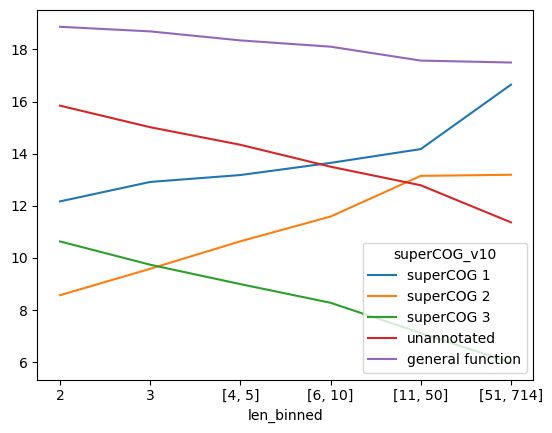

In [55]:
exploded_gr.reset_index(level=[0,1]).groupby('len_binned', observed=False)[cols].agg('mean').plot();

### High quality

33.92483996152443


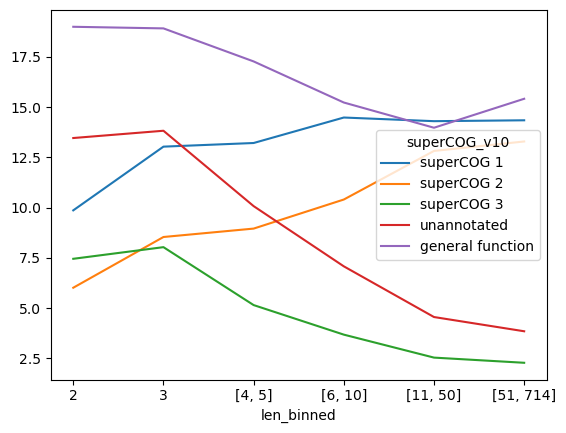

In [56]:
exploded_gr_hq = exploded_gr[(exploded_gr > 50).sum(axis=1) == 1]
print(len(exploded_gr_hq) / len(exploded_gr) * 100)
# # IMPOSE RESTRICTIONS ON NUMBER OF SAMPLES / STRUCTURE SIZE
exploded_gr_hq_melted = exploded_gr_hq.reset_index(level=[0,1]).groupby('len_binned', observed=False)[cols].agg('mean').dropna()
exploded_gr_hq_melted.plot();

In [57]:
exploded_gr_hq_melted = pd.melt(exploded_gr_hq_melted.reset_index().rename(columns={'len_binned': 'kind'}),
                                id_vars=['kind'], value_vars=cols, value_name='count')

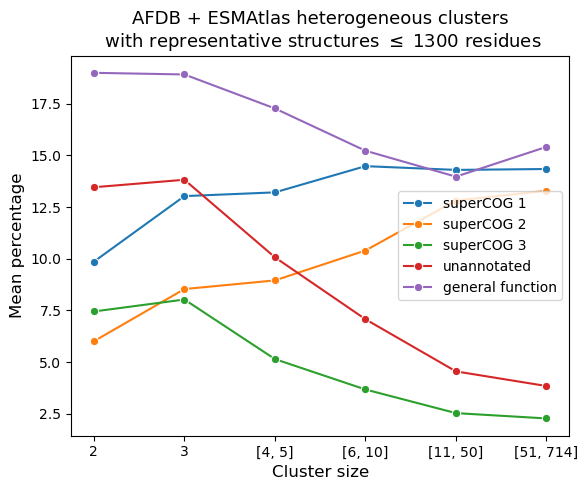

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
palette = ['#660301', '#013365', '#005B15', '#7F988A']
palette = [sns.color_palette("tab10")[k] for k in [1, 0, 3, 2]]
g = sns.lineplot(data=exploded_gr_hq_melted, x='kind', y='count', hue_order=cols,
             hue='superCOG_v10', marker='o', ax=ax)#, palette=palette)
g.legend_.set_title(None)
for t, l in zip(g.legend_.texts, cols):
    t.set_text(l)
ax.set_xlabel('Cluster size', fontsize=12)
ax.set_ylabel('Mean percentage', fontsize=12)
plt.title(f'{k} heterogeneous clusters\n' + r' with representative structures $\leq$ 1300 residues', fontsize=13)
plt.tight_layout()
plt.show()

# Figure 5A

In [59]:
num_prot = pd.DataFrame(columns=['num_mip', 'num_afdb_hq', 'num_afdb', 'num_esmatlas'])

### Singletons

In [60]:
for k in ['mip', 'afdb', 'esmatlas']:
    num_prot.loc[f'sing_{k}', f'num_{k}'] = len(heterogeneity[(heterogeneity.total_counts == 1) & \
                                                (heterogeneity[f'counts_{k}'] == 1)])
# AF HQ    
num_prot.loc[f'sing_afdb', f'num_afdb_hq'] = len(heterogeneity_hq[(heterogeneity_hq.total_counts == 1) & \
                                                (heterogeneity_hq[f'counts_afdb'] == 1)])

### Homogeneous clusters

In [61]:
for k in ['mip', 'afdb', 'esmatlas']:
    num_prot.loc[f'homo_{k}', f'num_{k}'] = heterogeneity[(heterogeneity.total_counts > 1) &\
    (heterogeneity.total_counts == heterogeneity[f'counts_{k}'])][f'counts_{k}'].sum()
# AF HQ
num_prot.loc[f'homo_afdb', f'num_afdb_hq'] = heterogeneity_hq[(heterogeneity_hq.total_counts > 1) &\
(heterogeneity_hq.total_counts == heterogeneity_hq[f'counts_afdb'])][f'counts_afdb'].sum()

### Heterogeneous clusters

In [62]:
combs = [('mip', 'afdb', 'esmatlas'), ('mip', 'esmatlas', 'afdb'), ('afdb', 'esmatlas', 'mip')]  # yes yes no

In [63]:
for comb in combs:
    tmp = heterogeneity[(heterogeneity[f'counts_{comb[0]}'] > 0) & (heterogeneity[f'counts_{comb[1]}'] > 0) &\
    (heterogeneity[f'counts_{comb[2]}'] == 0) & (heterogeneity.total_counts > 1)]
    for k in ['mip', 'afdb', 'esmatlas']:
        num_prot.loc[f"hetero_{comb[0]}_{comb[1]}", f'num_{k}'] = tmp[f'counts_{k}'].sum()
    # AF HQ
    if comb[0] == 'afdb':
        tmp = heterogeneity_hq[(heterogeneity_hq[f'counts_afdb'] > 0) & (heterogeneity_hq[f'counts_{comb[1]}'] > 0) &\
        (heterogeneity_hq[f'counts_{comb[2]}'] == 0) & (heterogeneity_hq.total_counts > 1)]
        num_prot.loc[f"hetero_afdb_{comb[1]}", f'num_afdb_hq'] = tmp[f'counts_afdb'].sum()
    elif comb[1] == 'afdb':
        tmp = heterogeneity_hq[(heterogeneity_hq[f'counts_{comb[0]}'] > 0) & (heterogeneity_hq[f'counts_afdb'] > 0) &\
        (heterogeneity_hq[f'counts_{comb[2]}'] == 0) & (heterogeneity_hq.total_counts > 1)]
        num_prot.loc[f"hetero_{comb[0]}_afdb", f'num_afdb_hq'] = tmp[f'counts_afdb'].sum()

In [64]:
tmp = heterogeneity[(heterogeneity.counts_mip > 0) & (heterogeneity.counts_afdb > 0) &\
(heterogeneity.counts_esmatlas > 0) & (heterogeneity.total_counts > 1)]
for k in ['mip', 'afdb', 'esmatlas']:
    num_prot.loc[f"hetero_mip_afdb_esmatlas", f'num_{k}'] = tmp[f'counts_{k}'].sum()
# AF HQ
tmp = heterogeneity_hq[(heterogeneity_hq.counts_mip > 0) & (heterogeneity_hq.counts_afdb > 0) &\
(heterogeneity_hq.counts_esmatlas > 0) & (heterogeneity_hq.total_counts > 1)]
for k in ['mip', 'afdb', 'esmatlas']:
    num_prot.loc[f"hetero_mip_afdb_esmatlas", f'num_afdb_hq'] = tmp[f'counts_afdb'].sum()

In [65]:
num_prot['num_afdb_lq'] = num_prot['num_afdb'] - num_prot['num_afdb_hq']
num_prot = num_prot[['num_afdb_hq', 'num_afdb_lq', 'num_esmatlas', 'num_mip']]

In [66]:
num_prot['labels'] = ['MIP sing.', 'AFDB sing.', 'ESMAtlas sing.', 'MIP homo.', 'AFDB homo.', 'ESMAtlas homo.',
'AFDB + MIP', 'ESMAtlas + MIP', 'AFDB + ESMAtlas', 'AFDB + ESMAtlas + MIP']

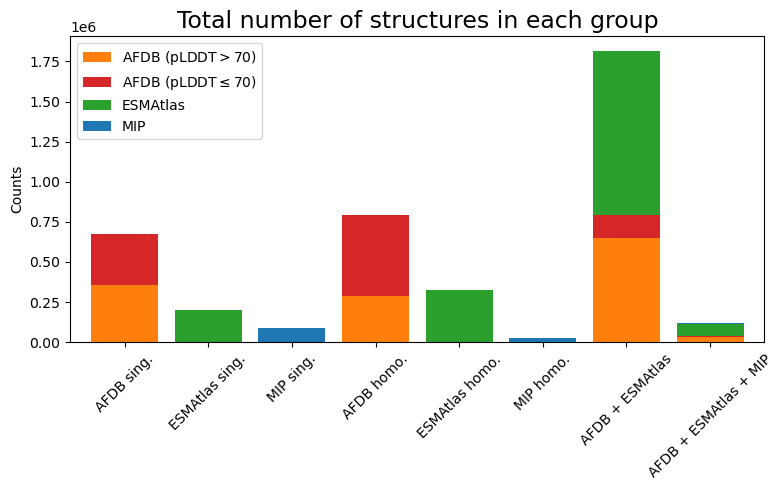

In [67]:
num_prot.loc['homo_mip', 'num_mip'] *= 10
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
num_prot_red = num_prot.loc[['sing_afdb', 'sing_esmatlas', 'sing_mip', 
                             'homo_afdb', 'homo_esmatlas', 'homo_mip', 'hetero_afdb_esmatlas',  'hetero_mip_afdb_esmatlas']]
num_prot_red.plot(kind='bar', stacked=True, ax=ax, width=0.8, legend=False, 
                  color=[sns.color_palette()[:4][i] for i in [1,3,2,0]])
ax.set_xticklabels(num_prot_red.labels)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3]
labels = [r'AFDB (pLDDT$>70$)', r'AFDB (pLDDT$\leq70$)', 'ESMAtlas', 'MIP']
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.set_ylabel('Counts')
plt.xticks(rotation=45)
plt.title('Total number of structures in each group', fontsize=17)
plt.tight_layout()
plt.show()
num_prot.loc['homo_mip', 'num_mip'] /= 10

# Interactive Sankey diagrams

## Only cluster type

In [68]:
# equivalent to `num_prot` but only HQ AFDB proteins are considered
num_prot_hq = pd.DataFrame(columns=['num_mip', 'num_afdb', 'num_esmatlas']) 

### Singletons

In [69]:
for k in ['mip', 'afdb', 'esmatlas']:
    num_prot_hq.loc[f'sing_{k}', f'num_{k}'] = len(heterogeneity_hq[(heterogeneity_hq.total_counts == 1) & \
                                                (heterogeneity_hq[f'counts_{k}'] == 1)])

### Homogeneous clusters

In [70]:
for k in ['mip', 'afdb', 'esmatlas']:
    num_prot_hq.loc[f'homo_{k}', f'num_{k}'] = heterogeneity_hq[(heterogeneity_hq.total_counts > 1) &\
    (heterogeneity_hq.total_counts == heterogeneity_hq[f'counts_{k}'])][f'counts_{k}'].sum()

### Heterogeneous clusters

In [71]:
combs = [('mip', 'afdb', 'esmatlas'), ('mip', 'esmatlas', 'afdb'), ('afdb', 'esmatlas', 'mip')]  # yes yes no

In [72]:
for comb in combs:
    tmp = heterogeneity_hq[(heterogeneity_hq[f'counts_{comb[0]}'] > 0) & (heterogeneity_hq[f'counts_{comb[1]}'] > 0) &\
    (heterogeneity_hq[f'counts_{comb[2]}'] == 0) & (heterogeneity_hq.total_counts > 1)]
    for k in ['mip', 'afdb', 'esmatlas']:
        num_prot_hq.loc[f"hetero_{comb[0]}_{comb[1]}", f'num_{k}'] = tmp[f'counts_{k}'].sum()

In [73]:
tmp = heterogeneity_hq[(heterogeneity_hq.counts_mip > 0) & (heterogeneity_hq.counts_afdb > 0) &\
(heterogeneity_hq.counts_esmatlas > 0) & (heterogeneity_hq.total_counts > 1)]
for k in ['mip', 'afdb', 'esmatlas']:
    num_prot_hq.loc[f"hetero_mip_afdb_esmatlas", f'num_{k}'] = tmp[f'counts_{k}'].sum()

### Create table

In [74]:
freq_table = []
for col in ['afdb', 'esmatlas', 'mip']:
    tmp = num_prot_hq[f'num_{col}'].to_frame(name='n').reset_index().fillna(0)
    tmp['database'] = col
    freq_table.append(tmp)
freq_table =  pd.concat(freq_table)

/tmp/ipykernel_4097391/203706868.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmp = num_prot_hq[f'num_{col}'].to_frame(name='n').reset_index().fillna(0)
/tmp/ipykernel_4097391/203706868.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmp = num_prot_hq[f'num_{col}'].to_frame(name='n').reset_index().fillna(0)
/tmp/ipykernel_4097391/203706868.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behav

In [75]:
# Create Nodes and Links data frames
nodes = pd.DataFrame({'name': pd.unique(freq_table[['database', 'index']].values.ravel('K'))})

links = pd.DataFrame({
    'source': [nodes[nodes['name'] == p].index[0] for p in freq_table['database']],
    'target': [nodes[nodes['name'] == f].index[0] for f in freq_table['index']],
    'value': freq_table['n']
})
# Convert source and target columns to integers
links['source'] = links['source'].astype(int)
links['target'] = links['target'].astype(int)

In [76]:
nodes['color'] = 'darkgray'
nodes.loc[0, 'color'] = f'rgb{tuple(int(255*el) for el in sns.color_palette()[1])}'
nodes.loc[1, 'color'] = f'rgb{tuple(int(255*el) for el in sns.color_palette()[2])}'
nodes.loc[2, 'color'] = f'rgb{tuple(int(255*el) for el in sns.color_palette()[0])}'

In [77]:
links.loc[links.source==0, 'color'] = 'orange'
links.loc[links.source==1, 'color'] = 'lightgreen'
links.loc[links.source==2, 'color'] = 'steelblue'

### Create plot

In [78]:
fig = go.Figure(go.Sankey(
    node=dict(pad=15,
        thickness=20,
        line=dict(color='grey', width=0.5),
        label=nodes['name'],
        color=nodes['color'],
    ),
    link=dict(source=links['source'],
        target=links['target'],
        value=links['value'],
        color=links['color'],
    )
))
# Set layout
fig.update_layout(title='',
    width=500,
    height=600, font_size=12)
fig.write_html("sankey_demo.html")

## Add SuperCOGs

In [79]:
num_fun = {}

### Singletons

In [80]:
for k in ['afdb', 'esmatlas', 'mip']:
    print(k)
    lab = f'sing_{k}'
    num_fun[lab] = heterogeneity_hq[(heterogeneity_hq.total_counts == 1) & (heterogeneity_hq[f'counts_{k}'] == 1)][['total_counts']]
    num_fun[lab] = num_fun[lab].join(supercog)[['superCOG_v10']].groupby('superCOG_v10', observed=False).size()

afdb
esmatlas
mip


### Homogeneous clusters

In [81]:
# HQ indices
idx_hq = set(mip_all.index.str.replace('.pdb' , '')) | set(hclust30.index) | set(afdb_hq.index)

In [82]:
for k in ['afdb', 'esmatlas', 'mip']:
    print(k)
    lab = f'homo_{k}'
    num_fun[lab] = heterogeneity_hq[(heterogeneity_hq.total_counts > 1) &\
    (heterogeneity_hq.total_counts == heterogeneity_hq[f'counts_{k}'])][['total_counts']]
    num_fun[lab] = num_fun[lab].join(all_clusters).explode('Protein')
    num_fun[lab] = num_fun[lab][num_fun[lab].Protein.isin(idx_hq)]
    num_fun[lab] = num_fun[lab].join(supercog)[['superCOG_v10']].groupby('superCOG_v10', observed=False).size()

afdb
esmatlas
mip


### Heterogeneous clusters

In [83]:
combs = [('mip', 'afdb', 'esmatlas'), ('mip', 'esmatlas', 'afdb'), ('afdb', 'esmatlas', 'mip')]  # yes yes no

In [84]:
for comb in combs:
    print(comb)
    lab = f'hetero_{comb[0]}_{comb[1]}'
    num_fun[lab] = heterogeneity_hq[(heterogeneity_hq[f'counts_{comb[0]}'] > 0) & (heterogeneity_hq[f'counts_{comb[1]}'] > 0) &\
    (heterogeneity_hq[f'counts_{comb[2]}'] == 0) & (heterogeneity_hq.total_counts > 1)][['total_counts']]
    num_fun[lab] = num_fun[lab].join(all_clusters).explode('Protein')
    num_fun[lab] = num_fun[lab][num_fun[lab].Protein.isin(idx_hq)]
    num_fun[lab] = num_fun[lab].join(supercog)[['superCOG_v10']].groupby('superCOG_v10', observed=False).size()

('mip', 'afdb', 'esmatlas')
('mip', 'esmatlas', 'afdb')
('afdb', 'esmatlas', 'mip')


In [85]:
lab = 'hetero_mip_afdb_esmatlas'
num_fun[lab] = heterogeneity_hq[(heterogeneity_hq.counts_mip > 0) & (heterogeneity_hq.counts_afdb > 0) &\
(heterogeneity_hq.counts_esmatlas > 0) & (heterogeneity_hq.total_counts > 1)]
num_fun[lab] = num_fun[lab].join(all_clusters).explode('Protein')
num_fun[lab] = num_fun[lab][num_fun[lab].Protein.isin(idx_hq)]
num_fun[lab] = num_fun[lab].join(supercog)[['superCOG_v10']].groupby('superCOG_v10', observed=False).size()

### Sanity check

In [86]:
assert len(idx_hq) == num_prot_hq.sum().sum() 
assert sum([v.sum() for v in num_fun.values()])

### Create table

In [87]:
freq_table_fun = []
for k, v in num_fun.items():
    tmp = v.to_frame('n').reset_index()
    tmp = tmp.rename(columns={'superCOG_v10': 'index'})
    # tmp = tmp[tmp['index'].isin(['s1', 's2', 's3', 'R', 'unannotated'])]
    tmp['database'] = k
    freq_table_fun.append(tmp)
freq_table_fun = pd.concat(freq_table_fun)
freq_table_fun = pd.concat([freq_table, freq_table_fun])

In [88]:
renames = {
    'afdb': 'AlphaFold',
    'esmatlas': 'ESMAtlas',
    'mip': 'MIP',
    'sing_afdb': 'sing. (AF)', 
    'sing_esmatlas': 'sing. (ESM)', 
    'sing_mip': 'sing. (MIP)', 
    'homo_afdb': 'homo. (AF)', 
    'homo_esmatlas': 'homo. (ESM)', 
    'homo_mip': 'homo. (MIP)', 
    'hetero_mip_afdb': 'hetero. (AF+MIP)', 
    'hetero_mip_esmatlas': 'hetero. (ESM+MIP)', 
    'hetero_afdb_esmatlas': 'hetero. (AF+ESM)', 
    'hetero_mip_afdb_esmatlas': 'hetero. (AF+ESM+MIP)', 
    'general function' : 'general',
    'superCOG 1' : 'superCOG 1', 
    'superCOG 1+2' : 'superCOG 1+2', 
    'superCOG 1+3' : 'superCOG 1+3', 
    'superCOG 2' : 'superCOG 2', 
    'superCOG 2+3' : 'superCOG 2+3', 
    'superCOG 3' : 'superCOG 3', 
    'unannotated': 'unannotated',
}

In [89]:
# Create Nodes and Links data frames
nodes = pd.DataFrame({'name': pd.unique(freq_table_fun[['database', 'index']].values.ravel('K'))})
links = pd.DataFrame({
    'source': [nodes[nodes['name'] == p].index[0] for p in freq_table_fun['database']],
    'target': [nodes[nodes['name'] == f].index[0] for f in freq_table_fun['index']],
    'value': freq_table_fun['n']
})
# Convert source and target columns to integers
links['source'] = links['source'].astype(int)
links['target'] = links['target'].astype(int)

In [90]:
nodes['color'] = 'darkgray'
nodes.loc[nodes[nodes.name == 'afdb'].index[0], 'color'] = f'rgb{tuple(int(255*el) for el in sns.color_palette()[1])}'
nodes.loc[nodes[nodes.name == 'esmatlas'].index[0], 'color'] = f'rgb{tuple(int(255*el) for el in sns.color_palette()[2])}'
nodes.loc[nodes[nodes.name == 'mip'].index[0], 'color'] = f'rgb{tuple(int(255*el) for el in sns.color_palette()[0])}'
nodes.loc[nodes[nodes.name == 'homo_afdb'].index[0], 'color'] = nodes.iloc[0].color
nodes.loc[nodes[nodes.name == 'sing_afdb'].index[0], 'color'] = nodes.iloc[0].color
nodes.loc[nodes[nodes.name == 'homo_esmatlas'].index[0], 'color'] = nodes.iloc[1].color
nodes.loc[nodes[nodes.name == 'sing_esmatlas'].index[0], 'color'] = nodes.iloc[1].color
nodes.loc[nodes[nodes.name == 'homo_mip'].index[0], 'color'] = nodes.iloc[2].color
nodes.loc[nodes[nodes.name == 'sing_mip'].index[0], 'color'] = nodes.iloc[2].color
nodes.loc[nodes[nodes.name == 'hetero_afdb_esmatlas'].index[0], 'color'] = 'rgb(178, 191, 55)'
nodes.loc[nodes[nodes.name == 'hetero_mip_afdb_esmatlas'].index[0], 'color'] = 'rgb(120, 90, 142)'
nodes.loc[nodes[nodes.name == 'general function'].index[0], 'color'] = 'rgb(228, 238, 230)' # R
nodes.loc[nodes[nodes.name == 'superCOG 1'].index[0], 'color'] = 'rgb(69, 1, 2)' # s1
nodes.loc[nodes[nodes.name == 'superCOG 2'].index[0], 'color'] = 'rgb(0, 51, 101)' # s2
nodes.loc[nodes[nodes.name =='superCOG 3'].index[0], 'color'] = 'rgb(1, 90, 21)' # s3
nodes.loc[nodes[nodes.name == 'superCOG 1+2'].index[0], 'color'] = 'rgb(126, 152, 177)' # s12
nodes.loc[nodes[nodes.name == 'superCOG 2+3'].index[0], 'color'] = 'rgb(179, 128, 128)' # s23
nodes.loc[nodes[nodes.name == 'superCOG 1+3'].index[0], 'color'] = 'rgb(127, 171, 137)' # s13
nodes.loc[nodes[nodes.name == 'unannotated'].index[0], 'color'] = 'rgb(140, 140, 140)' # unannotated

In [91]:
links['color'] = 'darkgray'
links.loc[links.source==nodes[nodes.name == 'afdb'].index[0], 'color'] = 'orange' # nodes.iloc[0].color
links.loc[links.source==nodes[nodes.name == 'esmatlas'].index[0], 'color'] = 'rgb(0, 204, 102)' # nodes.iloc[1].color
links.loc[links.source==nodes[nodes.name == 'mip'].index[0], 'color'] = 'steelblue' # nodes.iloc[2].color 
links.loc[links.target==nodes[nodes.name == 'general function'].index[0], 'color'] = 'rgb(228, 238, 230)' # R
links.loc[links.target==nodes[nodes.name == 'superCOG 1'].index[0], 'color'] = 'rgb(69, 1, 2)' # s1
links.loc[links.target==nodes[nodes.name == 'superCOG 2'].index[0], 'color'] = 'rgb(0, 51, 101)' # s2
links.loc[links.target==nodes[nodes.name == 'superCOG 3'].index[0], 'color'] = 'rgb(1, 90, 21)' # s3
links.loc[links.target==nodes[nodes.name == 'superCOG 1+2'].index[0], 'color'] = 'rgb(126, 152, 177)' # s12
links.loc[links.target==nodes[nodes.name == 'superCOG 2+3'].index[0], 'color'] = 'rgb(179, 128, 128)' # s23
links.loc[links.target==nodes[nodes.name == 'superCOG 1+3'].index[0], 'color'] = 'rgb(127, 171, 137)' # s13
links.loc[links.target==nodes[nodes.name == 'unannotated'].index[0], 'color'] = 'rgb(140, 140, 140)' # unannotated
nodes.name = nodes.name.map(renames)

### Create plot

In [92]:
fig = go.Figure(go.Sankey(
    node=dict(pad=15,
        thickness=20,
        line=dict(color='grey', width=0.5),
        label=nodes['name'],
        color=nodes['color'],
    ),
    link=dict(source=links['source'],
        target=links['target'],
        value=links['value'],
        color=links['color'],
    )
))
# Set layout
fig.update_layout(title='', width=900, height=800, 
                  font=dict(size = 15, family="Arial Black",color="red"))
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': '',
    'height': 900,
    'width': 800,
    'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
}
fig.write_html("../plots/sankey_diagram.html")